  Q1-A

In [62]:
from skimage import exposure
from skimage.exposure import match_histograms
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import cv2
from scipy.signal import convolve, convolve2d

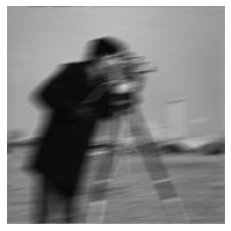

In [63]:
i1_1 = cv2.imread("Q1\\1.1.jpg")


image_rgb = cv2.cvtColor(i1_1, cv2.COLOR_BGR2RGB)

plt.imshow(image_rgb)
plt.axis('off')
plt.show()

In [64]:
i1_1 = cv2.cvtColor(i1_1, cv2.COLOR_BGR2GRAY)

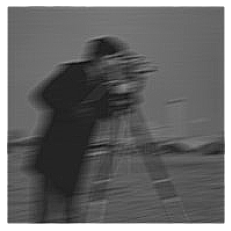

In [65]:
kernel = np.array([[1,1,1], [1,-9,1], [1,1,1]])
second_derivative_filter = convolve2d(i1_1, kernel, mode='same')
res = 1.5* i1_1 - second_derivative_filter

plt.imshow(res, cmap='gray')
plt.axis('off')
plt.show()



  Q1-B

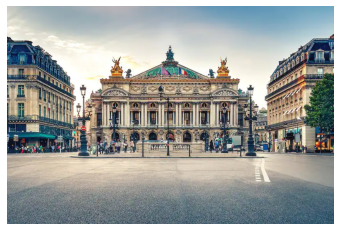

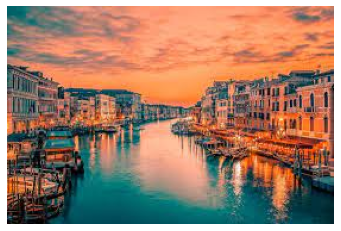

In [66]:
i1_2 = cv2.imread("Q1\\1.2.jpg")
i1_3 = cv2.imread("Q1\\1.3.jpg")

image1_rgb = cv2.cvtColor(i1_2, cv2.COLOR_BGR2RGB)
image2_rgb = cv2.cvtColor(i1_3, cv2.COLOR_BGR2RGB)

plt.imshow(image1_rgb)
plt.axis('off')
plt.show()

plt.imshow(image2_rgb)
plt.axis('off')
plt.show()

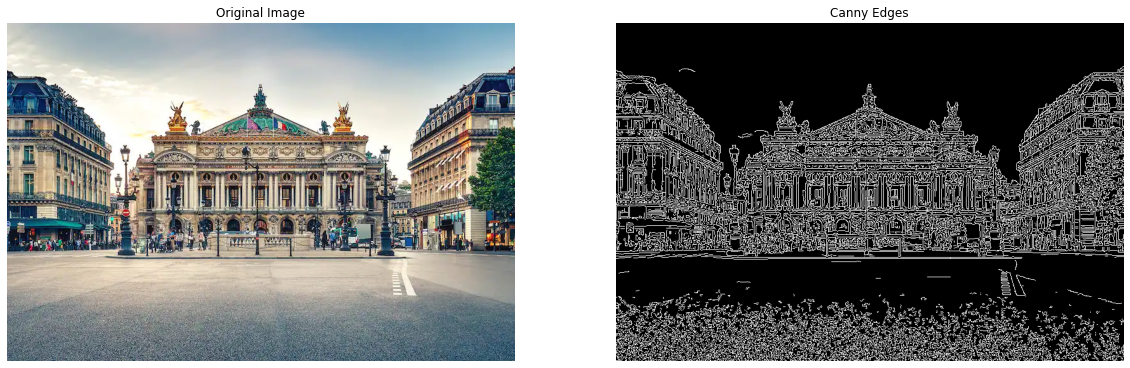

In [67]:
edges = cv2.Canny(i1_2, 100, 200)
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(20,10))

ax1.imshow(image1_rgb)
ax1.set_title('Original Image')
ax1.axis('off')

ax2.imshow(edges, cmap='gray')
ax2.set_title('Canny Edges')
ax2.axis('off')

plt.show()

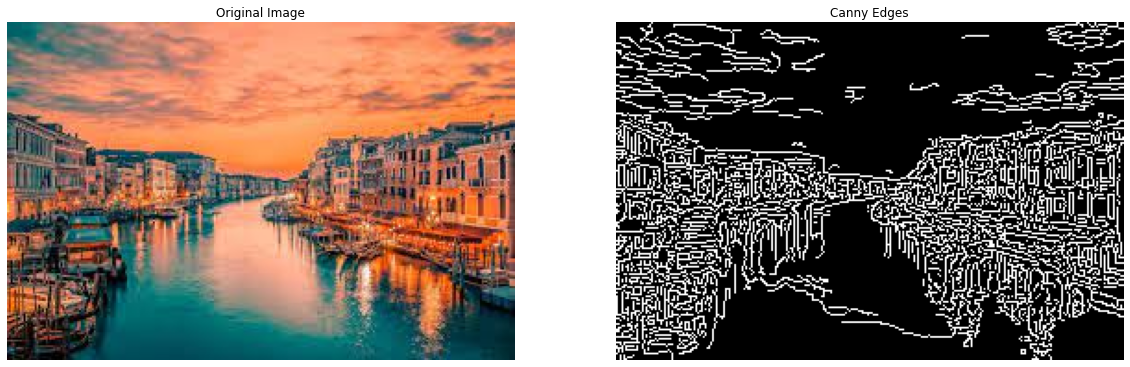

In [68]:
edges = cv2.Canny(i1_3, 100, 200)
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(20,10))

ax1.imshow(image2_rgb)
ax1.set_title('Original Image')
ax1.axis('off')

ax2.imshow(edges, cmap='gray')
ax2.set_title('Canny Edges')
ax2.axis('off')

plt.show()

  Q1-C

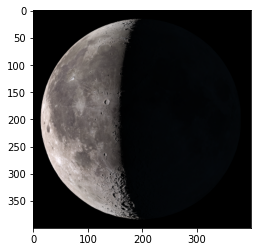

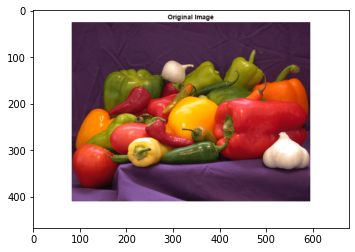

In [69]:
i1_4 = cv2.imread("Q1\\1.4.jpg")
i1_5 = cv2.imread("Q1\\1.5.jpg")

image4_rgb = cv2.cvtColor(i1_4, cv2.COLOR_BGR2RGB)
image5_rgb = cv2.cvtColor(i1_5, cv2.COLOR_BGR2RGB)

plt.imshow(image4_rgb)
plt.axis('on')
plt.show()

plt.imshow(image5_rgb)
plt.axis('on')
plt.show()

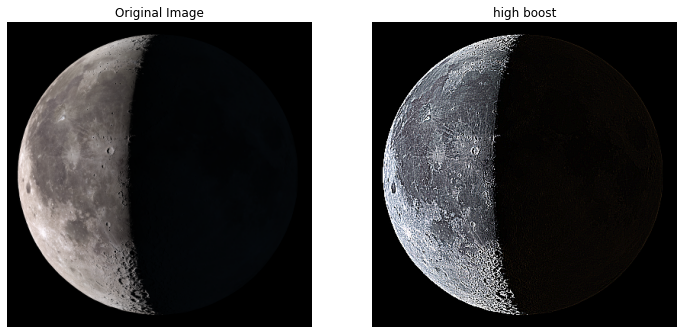

In [70]:
# Apply high-boost filter
kernel = np.array([[-1, -1, -1],
                   [-1, 9, -1],
                   [-1, -1, -1]])

filtered_image = cv2.filter2D(i1_4, -1, kernel)

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 6))

ax1.imshow(image4_rgb)
ax1.set_title('Original Image')
ax1.axis('off')

ax2.imshow(filtered_image, cmap='gray')
ax2.set_title('high boost')
ax2.axis('off')

plt.show()

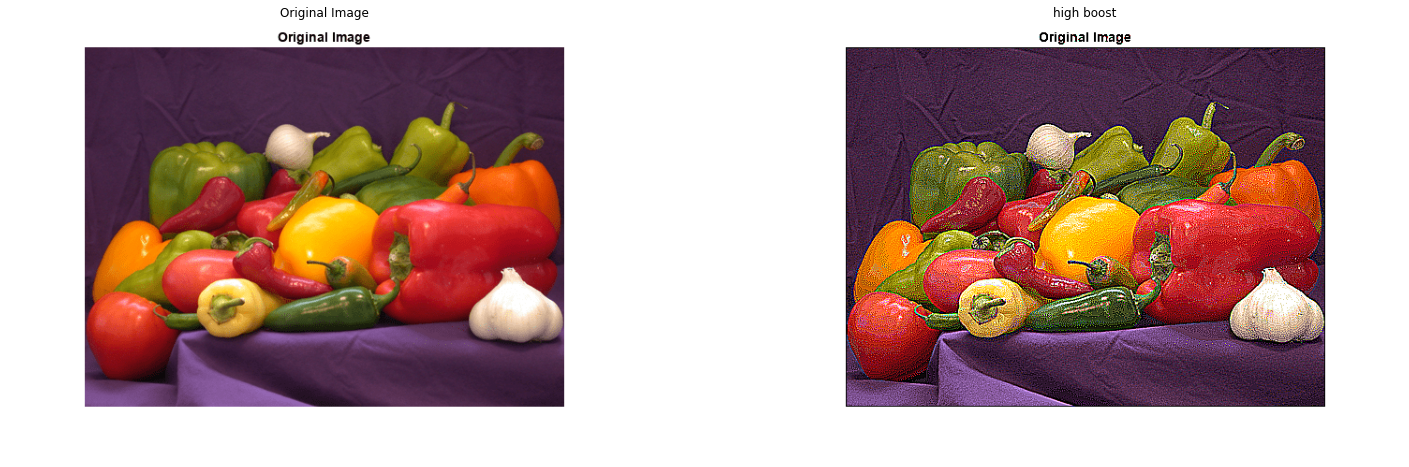

In [71]:
filtered_image = cv2.filter2D(image5_rgb, -1, kernel)

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(25, 15))

ax1.imshow(image5_rgb)
ax1.set_title('Original Image')
ax1.axis('off')

ax2.imshow(filtered_image)
ax2.set_title('high boost')
ax2.axis('off')

plt.show()

Q1-D

In [72]:
def canny_th(image__bgr):
    #using 90 and 95th percentile of the gradient magnitudes as th_low and th_high
    img = cv2.cvtColor(image__bgr, cv2.COLOR_BGR2GRAY)

    sobel_y = np.array([[-1, -2, -1], [0, 0, 0], [1, 2, 1]])
    Gy = convolve(img, sobel_y, mode='same')

    sobel_x = np.array([[-1, 0, 1], [-2, 0, 2], [-1, 0, 1]])
    Gx = convolve(img, sobel_x, mode='same')

    grad_magnitude = np.sqrt(Gx**2 + Gy**2)


    low_threshold, high_threshold = np.percentile(grad_magnitude, [90, 95])

    edges = cv2.Canny(image__bgr, low_threshold, high_threshold)
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(20,10))

    ax1.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
    ax1.set_title('Original Image')
    ax1.axis('off')

    ax2.imshow(edges, cmap='gray')
    ax2.set_title('Canny Edges')
    ax2.axis('off')

    plt.show()

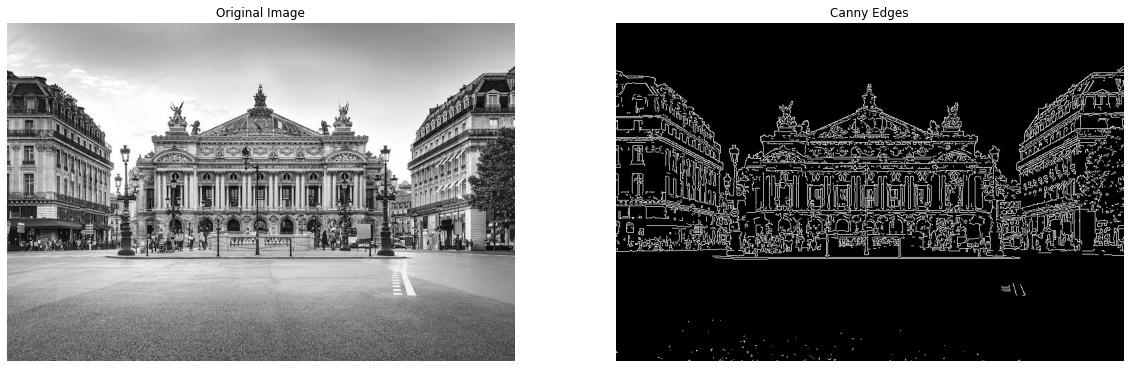

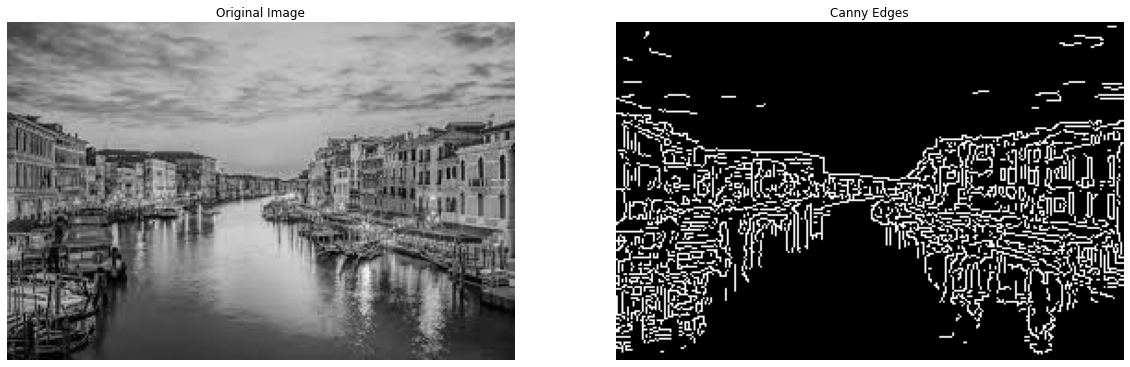

In [73]:
canny_th(i1_2)
canny_th(i1_3)